# Введение в Глубокое обучение(Deep Learning)

Глубокое обучение позволяет вычислительным моделям, состоящим из нескольких **слоев** обработки, изучать представления данных с несколькими уровнями абстракции.

Эти методы значительно улучшили современное состояние дел в области распознавания речи, визуального распознавания объектов, обнаружения объектов и многих других областях, таких как разработка лекарственных препаратов и геномика.

**Глубокое обучение** является одним из ведущих инструментов анализа данных в наши дни, а одной из наиболее распространенных платформ для глубокого обучения является **Keras**.

Сегодня мы рассмотрим глубокое обучение с использованием библиотеки `keras` с практическими примерами кода.

# Искусственные нейронные сети (ИНС)

В машинном обучении и когнитивной науке **искусственная нейронная сеть (ИНС)** — это сеть, созданная по образцу биологических нейронных сетей, которая используется для оценки или аппроксимации функций, которые могут зависеть от большого количества входных данных, которые, как правило, неизвестны.

ИНС строится из **узлов (нейронов)**, расположенных слоями между вектором признаков(х) и целевым вектором(у).

Узел в нейронной сети строится из **весов** и **функции активации**.

Ранняя версия ИНС состояла из **одного узла** и называлась **Перцептроном(Perceptron)**

![Perceptron.png](https://raw.githubusercontent.com/donnemartin/data-science-ipython-notebooks/5b3c00d462c6e9200315afe46d0093948621eb95/deep-learning/keras-tutorial/imgs/Perceptron.png)

**Перцептрон** — это алгоритм контролируемого обучения двоичных классификаторов. Это функции, которые могут решать, принадлежит ли вход (представленный вектором чисел) тому или иному классу.

Перцептрон имеет форму входных сигналов, связанных с ними **весовых коэффициентов** и **функции активации**. 

* Входные сигналы могут быть *числами или другими бинарными значениями*, 

* **Весовые коэффициенты** определяют важность каждого входного сигнала для классификации.

* **Функция активации** определяет, какой выходной сигнал будет сгенерирован на основе входных данных и весовых коэффициентов.

Обучение перцептрона происходит путем **настройки весовых коэффициентов** с помощью **алгоритма обратного распространения ошибки**. 
В начале обучения весовые коэффициенты инициализируются **случайными значениями**, а затем для каждой подачи входных данных перцептрон генерирует **выходной сигнал**. Если значение выходного сигнала не совпадает с ожидаемым, то **весовые коэффициенты корректируются** в соответствии с ошибкой.

Перцептрон имеет ограниченные возможности в обработке сложных данных, так как он способен дать только **линейное разделение между классами**. Однако, путем комбинирования нескольких перцептронов можно создавать более сложные модели нейронных сетей. Также существуют модификации перцептрона, такие как **многослойный перцептрон(MLP)**, которые способны решать более сложные задачи.

**Многослойный персептрон** имеет не один, а несколько слоев.

# Создание нейронных сетей с нуля (from scratch) 


### Идея:

Давайте воспользуемся простейшими принципами работы перцептрона и создадим простую его модель.
Это нужно сделать, для того, чтобы понять принцип его работы, вместе с принципом работы обратного распространения ошибки. 

**Дисклеймер: конкретный пирмер прецептрона не подходит для работы с реальными данными и решения реальных практических задач, мы создаем его для того, чтобы понять принцип работы ИНС**. 

In [1]:
# Импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy

In [2]:
# Небольшое напоминание:
# Если у вас отсутствует какая-то из библиотек, воспользуейтесь 
#!pip install ... Раскоментируйте эту строку и вставьте вместо ... название нужной вам библиотеки

In [3]:
# Для отображения графиков в строку
%matplotlib inline
# Определим дефолтный размер графиков
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [4]:
import random
random.seed(123) # random.seed для воспроизводимости результатов

## Чтение датасета

In [5]:
# загрузим наш датасет из сетевого ресурса

train = pd.read_csv("https://raw.githubusercontent.com/donnemartin/data-science-ipython-notebooks/5b3c00d462c6e9200315afe46d0093948621eb95/deep-learning/keras-tutorial/data/intro_to_ann.csv") 

In [6]:
# Далее будут варианты загрузки датасета в среду вашего ipynb, если у вас есть сырой файл с данными на вашем комьютере

In [7]:
# если бы вы использовали jupyter notebook и файл с вашими данными находился бы в той же папке, в которой ваш файл .ipynb:

# train = pd.read_csv("/intro_to_ann.csv")  # если ваш файл с данными находится в другой папке, просто добавьте путь к ней, например: train = pd.read_csv("/Users/tanya/Desktop/ds/_data1/intro_to_ann.csv") 

In [8]:
# если бы вы работали через гугл коллаб, сначала вам нужно было бы загрузить этот файл на ваш гугл диск, после чего выполнить следующий код:

# from google.colab import drive
#drive.mount('/content/drive')

# train = pd.read_csv("/content/drive/MyDrive/keras/intro_to_ann.csv") # после папки /MyDrive/ указывается дальнейший путь к вашему файлу с данными

In [9]:
# посмотрим что у нас за данные

train

,Feature1,Feature2,Target
0,2.067788,0.258133,1
1,0.993994,-0.609145,1
2,-0.690315,0.749921,0
3,1.023582,0.529003,0
4,0.700747,-0.496724,1
...,...,...,...
495,-1.215692,0.453118,0
496,-0.283986,0.108450,1
497,0.859747,-0.593557,1
498,-0.235540,0.951239,0


Как это можно заметить, в данных, которые мы закрузили имеется 2 некоторых признака и одна целевая(таргетная) переменная

In [10]:
X, y = np.array(train.iloc[:,0:2]), np.array(train.iloc[:,2]) # присвоим х значения признаков, а у - знчения таргета

In [11]:
X.shape # размерность х - > 500 строк, 2 столбца

(500, 2)

In [12]:
y.shape # размерность у - > 500 строк, 1 столбец

(500,)

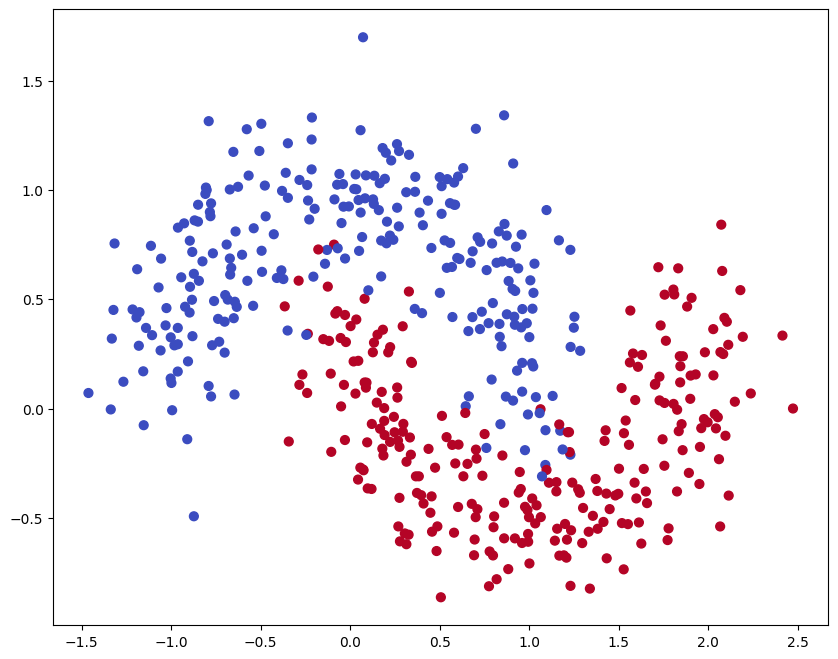

In [13]:
# Построим график по нашим данным
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.coolwarm)

В данном случае, мы покрасили разные по классу данные разными цветами (классы у нас 1 и 0, цвета - синий и красный)

## Начнем строить нашу ИНС

**Примечание:** этот процесс в конечном итоге приведет к созданию нашего собственного класса нейронных сетей.

### Немного пугающая, но вполне простая схема работы 

1. Входной слой (**Input layer**)
- Входные переменные обозначены как:  
  `x = [x₀, x₁, x₂, ..., xₘ]`
- Эти значения после их ввода поступают на **все нейроны скрытого слоя**.
- Весовые коэффициенты между входным и скрытым слоями обозначаются как `v_{j,i}`.

---

2. Скрытый слой (**Hidden layer**)
- Каждый нейрон скрытого слоя выполняет:
  1. Взвешенное суммирование входов:  
     `Σ (xᵢ × v_{j,i})`
  2. Применение **функции активации** `h` для получения выхода `o_j`
- Все выходы `o_j` поступают на каждый нейрон выходного слоя.
- Примеры весов: `v_{1,0}, v_{j,1}, v_{n,m}`

---

3. Выходной слой (**Output layer**)
- Каждый выходной нейрон получает **все значения из скрытого слоя**.
- Операции:
  1. Взвешенное суммирование:  
     `Σ (o_j × w_{k,j})`
  2. Применение функции активации `h` → `o'_k`
- Весовые коэффициенты здесь обозначаются как `w_{k,j}`.

---
- **Каждый вход участвует в формировании всех нейронов** скрытого слоя.

---

Общая структура:
- Сеть **полносвязная**: каждый нейрон слоя соединён со всеми нейронами следующего.
- Все вычисления проходят последовательно:
  **Входы → Скрытый слой → Выходной слой**


![mlp_details.png](https://raw.githubusercontent.com/donnemartin/data-science-ipython-notebooks/5b3c00d462c6e9200315afe46d0093948621eb95/deep-learning/keras-tutorial/imgs/mlp_details.png)

### Функция генерации случайного числа по двум заданным числам

**Где это будет использоваться?**: Это будет использовано для назначения первых, рандомно выбираемых, значений весовых коэффициентов

In [14]:
# рандомное число, где: [a, b) (включая a, но не включая b)
def rand(a, b):
    return (b-a)*random.random() + a

In [15]:
# Функция для создания матрицы
def makeMatrix(I, J, fill=0.0):
    return np.zeros([I,J])

### Определим нашу функцию активации. В данном случае используем `sigmoid` функцию

In [16]:
# Сигмоидная функция активации.
    
def sigmoid(x):
    
    # Преобразует вход в диапазон (0, 1).
    
    return 1/(1+np.exp(-x)) #альтернатива - math.tanh(x)

### Производная от нашей функции активации 

Примечание: это нам понадобится при запуске алгоритма **обратного распространения**.
> Формула: y' = y*(1-y)

In [17]:
def dsigmoid(y):
    return y - y**2

### Определим класс нашей нейронной сети

Когда мы впервые создаем архитектуру нейронных сетей, нам нужно знать количество входов, количество скрытых слоев и количество выходов.

Веса должны быть инициализированы случайным образом.

In [18]:

class ANN:
    def __init__(self, ni, nh, no):
        """
        Инициализация нейронной сети
        ni - количество входных нейронов (плюс 1 для bias-нейрона)
        nh - количество нейронов скрытого слоя
        no - количество выходных нейронов
        """
        self.ni = ni + 1 # Добавляем 1 к входам для bias-нейрона (смещения) 
        self.nh = nh
        self.no = no

        # Инициализация активаций нейронов
        self.ai = [1.0]*self.ni # Входной слой + bias
        self.ah = [1.0]*self.nh # Скрытый слой
        self.ao = [1.0]*self.no # Выходной слой
        
        # Создание матриц весов
        self.wi = makeMatrix(self.ni, self.nh) # Веса вход->скрытый слой
        self.wo = makeMatrix(self.nh, self.no) # Веса скрытый->выходной слой
        
        # Инициализация весов случайными значениями
        for i in range(self.ni):
            for j in range(self.nh):
                self.wi[i][j] = rand(-0.2, 0.2) # Малые значения для входов
        for j in range(self.nh):
            for k in range(self.no):
                self.wo[j][k] = rand(-2.0, 2.0) # Больший разброс для выходов

        # Матрицы для хранения предыдущих изменений весов (для момента)  
        self.ci = makeMatrix(self.ni, self.nh)
        self.co = makeMatrix(self.nh, self.no)
        

    def backPropagate(self, targets, N, M):
        """
        Обратное распространение ошибки (backpropagation)
        targets - целевые значения
        N - скорость обучения (learning rate)
        M - коэффициент момента (momentum)
        возвращает значение ошибки
        """
        # Проверка количества целевых значений
        if len(targets) != self.no:
            print(targets)
            raise ValueError('Неверное количество целевых значений')

        # Расчет дельт для входного слоя
        output_deltas = np.zeros(self.no)
        for k in range(self.no):
            error = targets[k]-self.ao[k] 
            output_deltas[k] = dsigmoid(self.ao[k]) * error

        # Расчет дельт для скрытого слоя
        hidden_deltas = np.zeros(self.nh)
        for j in range(self.nh):
            error = 0.0
            for k in range(self.no):
                error += output_deltas[k]*self.wo[j][k] 
            hidden_deltas[j] = dsigmoid(self.ah[j]) * error

        # Обновление выходных весов
        for j in range(self.nh):
            for k in range(self.no):
                change = output_deltas[k] * self.ah[j] # Изменение = дельта * активация скрытого нейрона
                # Обновление веса с учетом момента и скорости обучения
                self.wo[j][k] += N*change + M*self.co[j][k]
                self.co[j][k] = change # Сохраняем изменение для момента

        # Обновление весов входного слоя
        for i in range(self.ni):
            for j in range(self.nh):
                change = hidden_deltas[j]*self.ai[i] # Изменение = дельта скрытого * активация входного
                self.wi[i][j] += N*change + M*self.ci[i][j]
                self.ci[i][j] = change

        # Расчет общей ошибки (сумма квадратов ошибок)
        error = 0.0
        for k in range(len(targets)):
            error += 0.5*(targets[k]-self.ao[k])**2
        return error


    def test(self, patterns):
        self.predict = np.empty([len(patterns), self.no])
        for i, p in enumerate(patterns):
            self.predict[i] = self.activate(p)
            #self.predict[i] = self.activate(p[0])
            
    def activate(self, inputs):
        
        """
        Прямое распространение сигнала (feedforward)
        inputs - входные значения (без bias-нейрона)
        возвращает выходные значения сети
        """
        # Проверка количества входов
        if len(inputs) != self.ni-1:
            print(inputs)
            raise ValueError('Неверное количество входов')

        # Установка входных активаций (bias-нейрон остается =1.0)
        for i in range(self.ni-1):
            self.ai[i] = inputs[i]

        # hidden activations
        for j in range(self.nh):
            sum_h = 0.0
            for i in range(self.ni):
                sum_h += self.ai[i] * self.wi[i][j]
            self.ah[j] = sigmoid(sum_h)

        # output activations
        for k in range(self.no):
            sum_o = 0.0
            for j in range(self.nh):
                sum_o += self.ah[j] * self.wo[j][k]
            self.ao[k] = sigmoid(sum_o)

        return self.ao[:]
    

    def train(self, patterns, iterations=1000, N=0.5, M=0.1):
        # N: скорость обучения(learning rate)
        # M: momentum factor
        patterns = list(patterns)
        for i in range(iterations):
            error = 0.0
            for p in patterns:
                inputs = p[0]
                targets = p[1]
                self.activate(inputs)
                error += self.backPropagate([targets], N, M)
            if i % 5 == 0:
                print('error in interation %d : %-.5f' % (i,error))
            print('Final training error: %-.5f' % error)

### Теперь опробуем нашу модель на данных

In [19]:
# создадим нейросеть с двумя входами, одним скрытым слоем, и одним выходом
ann = ANN(2, 1, 1)

%timeit -n 1 -r 1 ann.train(zip(X,y), iterations=2)

error in interation 0 : 53.62995
Final training error: 53.62995
Final training error: 47.35136
7.85 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


### Прогнозирование на основе обучающего набора данных и измерение точности в выборке

In [20]:
%timeit -n 1 -r 1 ann.test(X)

1.48 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [21]:
prediction = pd.DataFrame(data=np.array([y, np.ravel(ann.predict)]).T, 
                          columns=["реальное", "предсказание"])
prediction.head()

,реальное,предсказание
0,1.0,0.491100
1,1.0,0.495469
2,0.0,0.097362
3,0.0,0.400006
4,1.0,0.489664


In [22]:
np.min(prediction.предсказание) # min значение предсказания

np.float64(0.07655307811318017)

### Давайте посмотрим на результаты в виде графика

In [23]:
# Вспомогательная функция для построения границы решения
# Это создает контурный график для визуального отображения границы решения

def plot_decision_boundary(nn_model):
    # Установите минимальное и максимальное значения и добавьте к ним отступы
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Сгенерировать сетку точек с расстоянием h между ними
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                         np.arange(y_min, y_max, h))
    # Предсказать значение функции
    nn_model.test(np.c_[xx.ravel(), yy.ravel()])
    Z = nn_model.predict
    Z[Z>=0.5] = 1
    Z[Z<0.5] = 0
    Z = Z.reshape(xx.shape)
    # Построить контур и обучающие примеры
    plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel2)
    plt.scatter(X[:, 0], X[:, 1], s=40,  c=y, cmap=plt.cm.coolwarm)

Text(0.5, 1.0, 'Наша первоначальная модель')

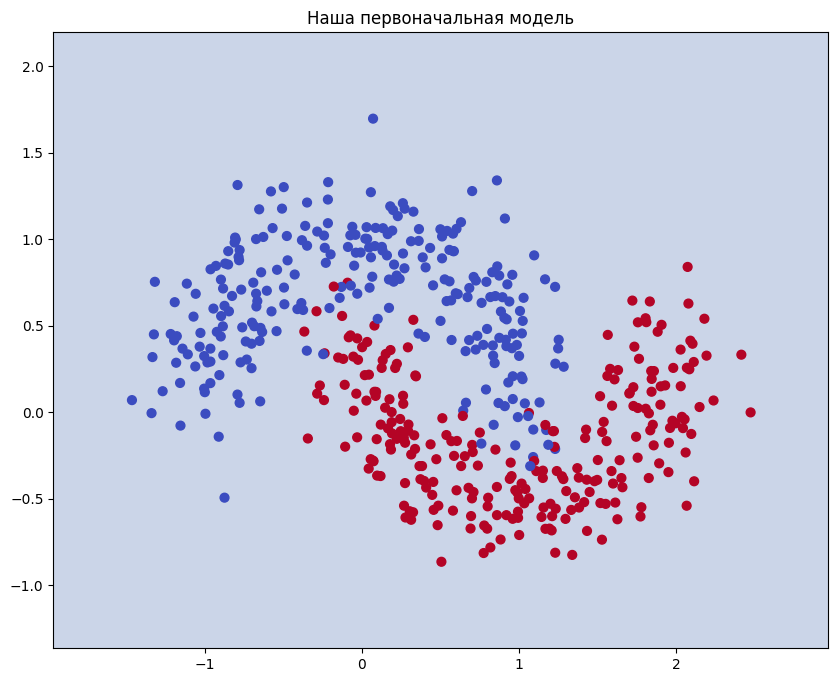

In [24]:
plot_decision_boundary(ann)
plt.title("Наша первоначальная модель")

## Задание

Создайте нейронную сеть с 10 скрытыми слоями. 

Как это повлияет на точность?

> Подсказка: сам класс нейронной сети уже написан, осталось вспомнить, что на входе при иницализации 

In [25]:
# Пишите тут:
ann = ANN(2, 10, 1)

Если у вас совсем кризис, бегите [сюда](https://github.com/donnemartin/data-science-ipython-notebooks/blob/master/deep-learning/keras-tutorial/solutions/sol_111.py)

error in interation 0 : 34.91394
Final training error: 34.91394
Final training error: 25.36183
43.3 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Text(0.5, 1.0, 'Наша следующая модель с 10 скрытыми слоями')

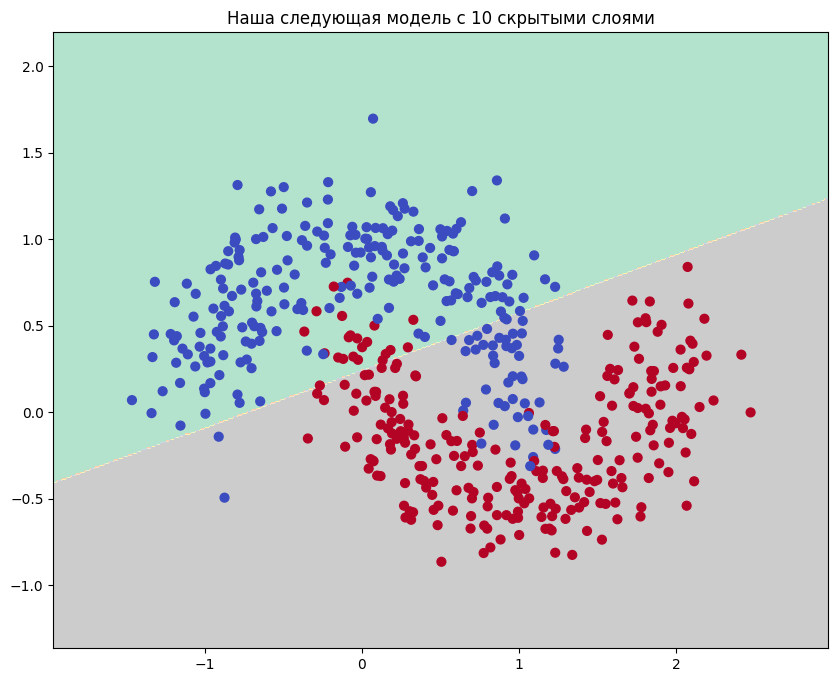

In [26]:
# Если вы все сделали правильно, то выполняйте код дальше:

%timeit -n 1 -r 1 ann.train(zip(X,y), iterations=2)
plot_decision_boundary(ann)
plt.title("Наша следующая модель с 10 скрытыми слоями")


### Свои догадки о точности пишите тут:
Слоёв стало больше, ошибка стала мельше, теперь сеть ловит больше зависимостей

## Задание 2

Обучите нейронную сети, увеличив количество эпох.

Как это повлияет на точность?

error in interation 0 : 24.94844
Final training error: 24.94844
Final training error: 24.88865
Final training error: 24.86721
Final training error: 24.84537
Final training error: 24.81835
error in interation 5 : 24.78738
Final training error: 24.78738
Final training error: 24.75448
Final training error: 24.72134
Final training error: 24.68912
Final training error: 24.65851
error in interation 10 : 24.62984
Final training error: 24.62984
Final training error: 24.60321
Final training error: 24.57859
Final training error: 24.55588
Final training error: 24.53492
error in interation 15 : 24.51557
Final training error: 24.51557
Final training error: 24.49769
Final training error: 24.48114
Final training error: 24.46581
Final training error: 24.45159
error in interation 20 : 24.43838
Final training error: 24.43838
Final training error: 24.42610
Final training error: 24.41468
Final training error: 24.40403
Final training error: 24.39411
error in interation 25 : 24.38484
Final training error: 2

Text(0.5, 1.0, 'Наша следующая модель с 10 скрытыми слоями и 150 эпохами')

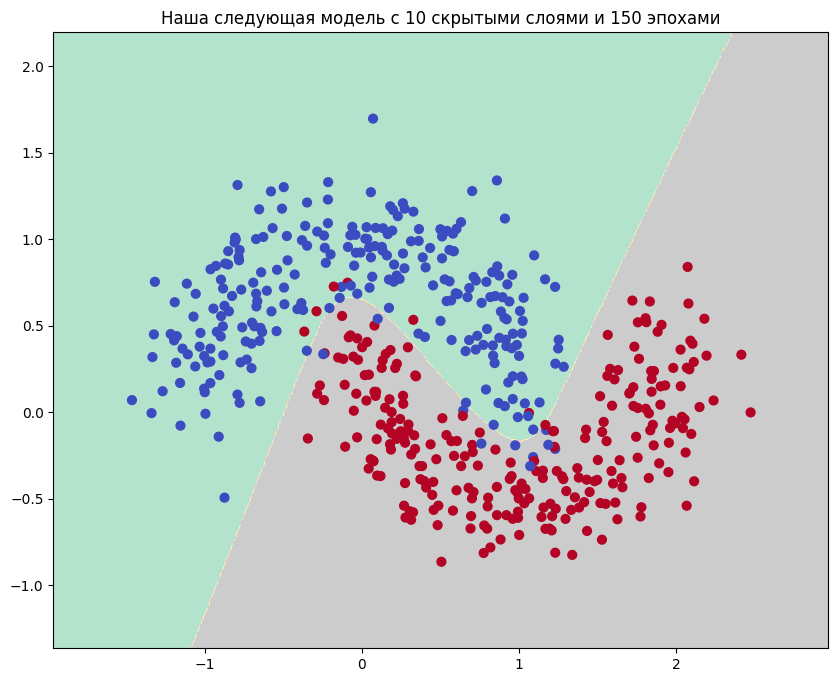

In [27]:
#Пишите тут 
%timeit -n 1 -r 1 ann.train(zip(X,y), iterations=150)
plot_decision_boundary(ann)
plt.title("Наша следующая модель с 10 скрытыми слоями и 150 эпохами")

Если у вас совсем кризис #2, бегите [сюда](https://github.com/donnemartin/data-science-ipython-notebooks/blob/master/deep-learning/keras-tutorial/solutions/sol_112.py)

### Свои догадки о точности #2 пишите тут:
Много скрытых слоёв, много итераций, соответственно сесь ловит даже малейшие закономерности. Но, сколрее всего, она ловит и очень много шумов. Для проверки этого уже нужна тестовая выборка

# Теперь перешагнем через кучу информации о библиотеках Keras/Theano/Tensorflow. 
## И разберем сверточные нейронные сети
### Ура, тут будут картинки

# Свёрточная нейронная сеть

**Свёрточная нейронная сеть (CNN, или ConvNet)** — это тип прямой искусственной нейронной сети, в которой схема связей между нейронами основана на организации зрительной коры головного мозга животных.

Сети состоят из нескольких слоёв небольших групп нейронов, которые обрабатывают части входного изображения, называемые рецептивными полями.

Выходные данные этих наборов затем объединяются таким образом, чтобы их входные области перекрывались, чтобы получить более точное представление исходного изображения; это повторяется для каждого такого слоя.

## Как это выглядит со стороны?

![](https://raw.githubusercontent.com/donnemartin/data-science-ipython-notebooks/5b3c00d462c6e9200315afe46d0093948621eb95/deep-learning/keras-tutorial/imgs/convnets_cover.png)

## Классификация изображений

**Классификация изображений** - это задача получения входного изображения и вывода класса (кошки, собаки и т.д.) Или вероятности классов, которые наилучшим образом описывают изображение.

Для людей распознавание является одним из первых навыков, которым мы овладеваем с момента рождения, и который приходит естественным образом и без усилий, когда мы становимся взрослыми.

Эти навыки быстрого распознавания паттернов, *обобщения* на основе предварительных знаний и адаптации к различным условиям изображения - это те навыки, которыми мы не делимся с машинами.

## Входы и выходы

![](https://raw.githubusercontent.com/donnemartin/data-science-ipython-notebooks/5b3c00d462c6e9200315afe46d0093948621eb95/deep-learning/keras-tutorial/imgs/cnn1.png)

Когда компьютер видит изображение (принимает изображение в качестве входных данных), он увидит массив значений пикселей. 

В зависимости от разрешения и размера изображения он будет видеть массив чисел размером 32 x 32 x 3 (3 относится к значениям RGB).

допустим, у нас есть цветное изображение в формате JPG и его размер равен 480 x 480. Репрезентативный массив будет иметь размер 480 x 480 x 3. Каждому из этих чисел присваивается значение от 0 до 255, которое описывает интенсивность пикселей в этой точке.

## Цель

Мы хотим, чтобы компьютер мог различать все полученные изображения и определять уникальные особенности, которые делают собаку собакой или которые делают кошку кошкой. 

Когда мы смотрим на изображение собаки, мы можем классифицировать ее как таковую, если на изображении есть идентифицируемые признаки, такие как лапы или 4 лапы. 

Аналогичным образом компьютер должен быть способен выполнять классификацию изображений, ища * низкоуровневые * объекты, такие как края и кривые, а затем переходя к более абстрактным концепциям с помощью серии ** сверточных слоев **.

## Структура CNN

> Более подробный обзор того, что делают CNN, заключается в том, что вы берете изображение, пропускаете его через серию сверточных, нелинейных, объединяющих (понижающую дискретизацию) и полностью связанных слоев и получаете результат. Как мы говорили ранее, результатом может быть один класс или вероятность того, что классы наилучшим образом описывают изображение. 

# Сверточный слой

Первый слой в CNN всегда является ** Сверточным слоем **.

![](https://raw.githubusercontent.com/donnemartin/data-science-ipython-notebooks/5b3c00d462c6e9200315afe46d0093948621eb95/deep-learning/keras-tutorial/imgs/conv.png)

### Сверточные фильтры

Сверточный фильтр, очень похожий на ядро в распознавании изображений, представляет собой небольшую матрицу, полезную для размытия, повышения резкости, тиснения, обнаружения краев и многого другого.

Это достигается с помощью свертки между ядром и изображением.

Основное отличие здесь в том, что матрицы conv изучаются.

![](https://raw.githubusercontent.com/donnemartin/data-science-ipython-notebooks/5b3c00d462c6e9200315afe46d0093948621eb95/deep-learning/keras-tutorial/imgs/keDyv.png)

Поскольку фильтр скользит, или **свертывается**, вокруг входного изображения, он умножает значения в фильтре на исходные значения пикселей изображения (он же вычисляет **поэлементное умножение**).

![](https://raw.githubusercontent.com/donnemartin/data-science-ipython-notebooks/5b3c00d462c6e9200315afe46d0093948621eb95/deep-learning/keras-tutorial/imgs/cnn2.png)

Теперь мы повторяем этот процесс для каждого местоположения на входном томе. (Следующим шагом будет перемещение фильтра вправо на 1 единицу, затем снова вправо на 1 единицу и так далее).

После перемещения фильтра по всем местоположениям у нас остается массив чисел, обычно называемый **картой активации** или **картой функций**.

## Перспектива высокого уровня

Давайте кратко поговорим о том, что на самом деле делает эта свертка на высоком уровне. 

Каждый из этих фильтров можно рассматривать как **идентификаторы объектов** (например, *прямые края, простые цвета, кривые*).

![](https://raw.githubusercontent.com/donnemartin/data-science-ipython-notebooks/5b3c00d462c6e9200315afe46d0093948621eb95/deep-learning/keras-tutorial/imgs/cnn3.png)

### Визуализация восприимчивого поля

![](https://raw.githubusercontent.com/donnemartin/data-science-ipython-notebooks/5b3c00d462c6e9200315afe46d0093948621eb95/deep-learning/keras-tutorial/imgs/cnn4.png)

![](https://raw.githubusercontent.com/donnemartin/data-science-ipython-notebooks/5b3c00d462c6e9200315afe46d0093948621eb95/deep-learning/keras-tutorial/imgs/cnn5.png)

![](https://raw.githubusercontent.com/donnemartin/data-science-ipython-notebooks/5b3c00d462c6e9200315afe46d0093948621eb95/deep-learning/keras-tutorial/imgs/cnn6.png)

Значение намного ниже! Это потому, что в разделе изображения не было ничего, что отвечало бы фильтру детектора кривой. Помните, что результатом этого слоя conv является карта активации. 

# Углубляясь в Сеть

Теперь в традиционной архитектуре **сверточной нейронной сети** существуют другие уровни, которые чередуются между этими уровнями conv.

<img src="https://adeshpande3.github.io/assets/Table.png"/>

## Слой ReLU (выпрямленных линейных единиц измерения)

После каждого слоя conv принято наносить *нелинейный слой* (или **слой активации**) сразу после этого.


Цель этого уровня - внести нелинейность в систему, которая в основном только что вычисляла линейные операции на уровнях conv (просто поэлементные умножения и суммирования)

В прошлом использовались нелинейные функции, такие как tanh и sigmoid, но исследователи обнаружили, что **Слои ReLU** работают намного лучше, потому что сеть способна обучаться намного быстрее (из-за эффективности вычислений) без существенного снижения точности.

Это также помогает решить **проблему исчезающего градиента**, которая заключается в том, что нижние уровни сети обучаются очень медленно, потому что градиент экспоненциально уменьшается по слоям

(**очень кратко**)

Проблема исчезающего градиента зависит от выбора функции активации. 

Многие распространенные функции активации (например, `сигмовидная` или `tanh`) *сокращают* свой ввод до очень малого выходного диапазона очень нелинейным образом. 

Например, сигмоид отображает линию действительных чисел в "небольшой" диапазон [0, 1].

В результате возникают большие области входного пространства, которые отображаются в чрезвычайно малом диапазоне. 

В этих областях входного пространства даже большое изменение входных данных приведет к небольшому изменению выходных данных - следовательно, градиент **невелик**.

### ReLu

Функция **ReLU** определяется как $ f(x) = \max(0, x),$ [2]

Плавным приближением к выпрямителю является * аналитическая функция *: $ f (x) = \ ln (1 + e ^ x) $

которая называется функцией **softplus** .

Производная softplus равна $ f' (x) = e ^ x / (e ^ x + 1) = 1 / (1 + e ^ {-x}) $, т.е. **логистической функции**.

## Объединение слоев (Pooling Layers) 

 После нескольких слоев ReLU обычно наносится **объединяющий слой** (он же *слой с понижающей дискретизацией*).

В этой категории также есть несколько вариантов слоев, наиболее популярным из которых является **maxpooling**. 

Пример фильтра MaxPooling

![](https://raw.githubusercontent.com/donnemartin/data-science-ipython-notebooks/5b3c00d462c6e9200315afe46d0093948621eb95/deep-learning/keras-tutorial/imgs/MaxPool.png)

Other options for pooling layers are average pooling and L2-norm pooling. 

The intuition behind this Pooling layer is that once we know that a specific feature is in the original input volume (there will be a high activation value), its exact location is not as important as its relative location to the other features. 

Therefore this layer drastically reduces the spatial dimension (the length and the width but not the depth) of the input volume.

This serves two main purposes: reduce the amount of parameters; controlling overfitting. 

An intuitive explanation for the usefulness of pooling could be explained by an example: 

Lets assume that we have a filter that is used for detecting faces. The exact pixel location of the face is less relevant then the fact that there is a face "somewhere at the top"

## Выпадающий слой (Dropout Layer)

**Выпадающие слои** имеют очень специфическую функцию для *выпадения* случайного набора активаций в этих слоях, устанавливая их равными нулю при прямом прохождении. Вот так просто. 

Это позволяет избежать *переобучения*, но должно использоваться **только** во время тренировки, а **не** во время тестирования. 

## Полностью Подключенный слой

Последний слой, однако, является важным, а именно **Полностью подключенный слой**.

По сути, уровень FC проверяет, какие объекты высокого уровня наиболее сильно коррелируют с определенным классом и имеют определенные веса, так что когда вы вычисляете произведения между весами и предыдущим уровнем, вы получаете правильные вероятности для разных классов.

![](https://raw.githubusercontent.com/donnemartin/data-science-ipython-notebooks/5b3c00d462c6e9200315afe46d0093948621eb95/deep-learning/keras-tutorial/imgs/ConvNet%20LeNet.png)

# CNN в Keras

**Keras** поддерживает:

- 1D Сверточные слои;
- 2D Сверточные слои;
- 3D Сверточные слои;

Соответствующий пакет `keras` называется `keras.layers.convolutional`

#### Свертка 1D

```python
from keras.layers.convolutional import Convolution1D
Convolution1D(nb_filter, filter_length, init='uniform',
              activation='linear', weights=None,
              border_mode='valid', subsample_length=1,
              W_regularizer=None, b_regularizer=None,
              activity_regularizer=None, W_constraint=None,
              b_constraint=None, bias=True, input_dim=None,
              input_length=None)
```

> Оператор свертки для фильтрации окрестностей **одномерных входных данных**. При использовании этого слоя в качестве первого слоя в модели укажите либо аргумент ключевого слова `input_dim` (int, например 128 для последовательностей 128-мерных векторов), либо `input_shape` (кортеж целых чисел, например (10, 128) для последовательностей из 10 векторов 128-мерных векторов).

#### Пример

```python

# apply a convolution 1d of length 3 to a sequence with 10 timesteps,
# with 64 output filters
model = Sequential()
model.add(Convolution1D(64, 3, border_mode='same', input_shape=(10, 32)))
# now model.output_shape == (None, 10, 64)

# add a new conv1d on top
model.add(Convolution1D(32, 3, border_mode='same'))
# now model.output_shape == (None, 10, 32)
```

#### Свертка 2D

```python
from keras.layers.convolutional import Convolution2D
Convolution2D(nb_filter, nb_row, nb_col, 
              init='glorot_uniform',
              activation='linear', weights=None,
              border_mode='valid', subsample=(1, 1),
              dim_ordering='default', W_regularizer=None,
              b_regularizer=None, activity_regularizer=None,
              W_constraint=None, b_constraint=None, 
              bias=True)
```

#### Пример

```python

# apply a 3x3 convolution with 64 output filters on a 256x256 image:
model = Sequential()
model.add(Convolution2D(64, 3, 3, border_mode='same', 
          input_shape=(3, 256, 256)))
# now model.output_shape == (None, 64, 256, 256)

# add a 3x3 convolution on top, with 32 output filters:
model.add(Convolution2D(32, 3, 3, border_mode='same'))
# now model.output_shape == (None, 32, 256, 256)

```

## Размеры конвективных фильтров в Keras

Сложная структура ConvNets *может* привести к представлению, которое сложно понять.

Конечно, размеры варьируются в зависимости от размера сверточных фильтров (например, 1D, 2D).

### Свертка 1D

**Форма ввода**:

**3D** тензор с формой: (`samples`, `steps`, `input_dim`).

**Форма вывода**:

**3D** тензор с формой: (`samples`, `new_steps`, `nb_filter`).

### Свертка 2D

**Форма ввода**:

**4D** тензор с формой: 

- (`samples`, `channels`, `rows`, `cols`) if `dim_ordering='th'`
- (`samples`, `rows`, `cols`, `channels`) if `dim_ordering='tf'`

**Форма вывода**:

**4D** тензор с формой:

- (`samples`, `nb_filter`, `new_rows`, `new_cols`) 
if `dim_ordering='th'`
- (`samples`, `new_rows`, `new_cols`, `nb_filter`) if `dim_ordering='tf'`

# Обмен рукопожатиями с Keras

## Определение проблемы

*Распознавание цифр, написанных от руки*

## Данные

База данных MNIST (http://yann.lecun.com/exdb/mnist) содержит базу данных рукописных цифр. 

Обучающий набор содержит выборки стоимостью 60 000 долларов. 
Тестовый набор содержит выборки стоимостью 10 000 долларов.

Цифры приведены к нормированному размеру и центрированы на изображении фиксированного размера. 

На странице данных есть описание того, как были собраны данные. На ней также есть отчеты о тестировании различных алгоритмов в тестовом наборе данных. 

### Загрузите данные

Давайте загрузим их с помощью библиотеки `keras` и посмотрим, как они выглядят.

In [32]:
pip install tensorflow
pip install keras
import numpy as np
import keras

SyntaxError: invalid syntax (825571517.py, line 1)

In [33]:
import os
import gzip
import pickle
from keras.datasets import mnist

def load_mnist_data(path_to_file=None):
    """
    Загружает данные MNIST. Если указано path_to_file, пытается загрузить из локального файла.
    Если файл отсутствует, загружает стандартный набор MNIST из Keras.

    :param path_to_file: Путь к локальному файлу mnist.pkl.gz
    :return: Кортеж из обучающих и тестовых данных
    """
    if path_to_file and os.path.exists(path_to_file):
        print(f"Загрузка данных из файла: {path_to_file}")
        with gzip.open(path_to_file, 'rb') as f:
            data = pickle.load(f, encoding='latin1')
        return data
    else:
        if path_to_file:
            print(f"Файл {path_to_file} не найден. Загружаем данные из стандартного набора MNIST...")
        return mnist.load_data()

# Определяем директорию для данных
data_dir = os.path.join(os.getcwd(), 'data')
os.makedirs(data_dir, exist_ok=True)

# Указываем путь к локальному файлу
path_to_dataset = os.path.join(data_dir, 'mnist.pkl.gz')

# Загружаем данные
(X_train, y_train), (X_test, y_test) = load_mnist_data(path_to_file=path_to_dataset)

# Проверяем размеры данных
print(f"Размер X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Размер X_test: {X_test.shape}, y_test: {y_test.shape}")


ModuleNotFoundError: No module named 'tensorflow'

# Задания:
## Aka Базовый анализ данных в наборе данных

In [29]:
# Какой тип данных у X_train?
print("Тип данных X_train:", type(X_train))

NameError: name 'X_train' is not defined

In [ ]:
# Какой тип данных у y_train?
print("Тип данных y_train:", type(y_train))

In [ ]:
# Найти количество наблюдений в обучающих данных
num_train = X_train.shape[0]
print("Количество наблюдений в обучающих данных (X_train):", num_train)

In [ ]:
# Найти количество наблюдений в тестовых данных
print("Количество наблюдений в тестовых данных (X_test):", num_test)

In [ ]:
# Отобразить первые 2 записи X_train
print("\nПервые 2 записи X_train:")
print(X_train[:2])

In [ ]:
# Отобразить первые 10 записей y_train
print("\nПервые 10 записей y_train:")
print(y_train[:10])

In [ ]:
# Найдите количество наблюдений для каждой цифры в наборе данных y_train 
unique_train, counts_train = np.unique(y_train, return_counts=True)
print("\nКоличество наблюдений для каждой цифры в y_train:")
for digit, count in zip(unique_train, counts_train):
    print(f"Цифра {digit}: {count}")

In [ ]:
# Найдите количество наблюдений для каждой цифры в наборе данных y_test 
unique_test, counts_test = np.unique(y_test, return_counts=True)
print("\nКоличество наблюдений для каждой цифры в y_test:")
for digit, count in zip(unique_test, counts_test):
    print(f"Цифра {digit}: {count}")

In [ ]:
# Какова размерность X_train ?. Что это значит?
print("\nРазмерность X_train:", X_train.shape)
# Размерность X_train означает: (число наблюдений, высота изображения, ширина изображения)

### Отображать изображения

Теперь давайте отобразим некоторые изображения и посмотрим, как они выглядят

Мы будем использовать библиотеку `matplotlib` для отображения изображения

In [ ]:
from matplotlib import pyplot
import matplotlib as mpl
%matplotlib inline

In [ ]:
# Отображение первых обучающих данных

In [ ]:
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
imgplot = ax.imshow(X_train[1], cmap=mpl.cm.Greys)
imgplot.set_interpolation('nearest')
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_ticks_position('left')
pyplot.show()

In [ ]:
# Теперь давайте отобразим 11-ю запись
plt.imshow(X_train[10], cmap='gray')  # Используем оттенки серого для изображения MNIST
plt.title(f"11-я запись, метка: {y_train[10]}")
plt.axis('off')  # Отключаем оси для наглядности
plt.show()

# Сети свертки для MNIST

Запуск моделей глубокого обучения может занять довольно много времени, особенно если не используется графический процессор. 

В интересах экономии времени вы могли бы выбрать подмножество наблюдений (например, $ 1000 $), которые представляют собой определенное число по вашему выбору (например, $ 6 $), и наблюдения за $ 1000 $, которые не являются этим конкретным числом (например, $\neq 6 $). 

Мы построим модель, используя это, и посмотрим, как она работает с тестовым набором данных

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers.legacy import SGD
import matplotlib.pyplot as plt

## Загрузка данных

In [ ]:
# Установка seed для воспроизводимости
np.random.seed(1338)
tf.random.set_seed(1338)

In [ ]:
X_test_orig = X_test

## Подготовка данных

In [ ]:
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [ ]:
np.random.seed(1338)

# Тестовые данные
X_test = X_test.copy()
Y = y_test.copy()

# Преобразование выходных данных в двоичную классификацию(Six=1,Not Six=0)
Y_test = Y == 6
Y_test = Y_test.astype(int)

# Выбор 5918 примеров, где результат равен 6
X_six = X_train[y_train == 6].copy()
Y_six = y_train[y_train == 6].copy()

# Выбор примеров, где выходные данные не равны 6
X_not_six = X_train[y_train != 6].copy()
Y_not_six = y_train[y_train != 6].copy()

# Выбор 6000 случайных примеров из данных, которые 
# содержат только те данные, выходные данные которых не равны 6
random_rows = np.random.randint(0,X_six.shape[0],6000)
X_not_six = X_not_six[random_rows]
Y_not_six = Y_not_six[random_rows]

In [ ]:
# Добавление данных с выводом как 6 и данных с выводом как <> 6
X_train = np.append(X_six,X_not_six)

# Преобразование добавленных данных в подходящую форму
X_train = X_train.reshape(X_six.shape[0] + X_not_six.shape[0], 
                          1, img_rows, img_cols)

# Добавление меток и преобразование меток в 
# двоичная классификация(Six=1,Not Six=0)
Y_labels = np.append(Y_six,Y_not_six)
Y_train = Y_labels == 6 
Y_train = Y_train.astype(int)

In [ ]:
print(X_train.shape, Y_labels.shape, X_test.shape, Y_test.shape)

In [ ]:
# Преобразование классов в их двоичную категориальную форму
nb_classes = 2
Y_train = tf.keras.utils.to_categorical(Y_train, nb_classes)
Y_test = tf.keras.utils.to_categorical(Y_test, nb_classes)

# Простой CNN

In [ ]:
#Инициализация значений для нейронной сети свертки
nb_epoch = 2
batch_size = 128
# количество используемых сверточных фильтров
nb_filters = 32
# размер зоны для максимального объединения
nb_pool = 2
# размер ядра свертки
nb_conv = 3

sgd = SGD(learning_rate=0.1, momentum=0.9, nesterov=True)

### Шаг 1: Определение модели

In [ ]:
model = Sequential()

model.add(Conv2D(filters=nb_filters, kernel_size=nb_conv,
                        padding='same'))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

### Шаг 2: Компиляция

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

### Шаг 3: Обучение

In [ ]:
model.fit(X_train, Y_train, batch_size=batch_size, 
          epochs=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

### Шаг 4: Оценка

In [ ]:
# Оценка модели на основе тестовых данных    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

### Давайте построим прогнозы нашей модели!

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
slice = 15
predicted = model.predict(X_test[:slice]).argmax(-1)

plt.figure(figsize=(16,8))
for i in range(slice):
    plt.subplot(1, slice, i+1)
    plt.imshow(X_test_orig[i], interpolation='nearest')
    plt.text(0, 0, predicted[i], color='black', 
             bbox=dict(facecolor='white', alpha=1))
    plt.axis('off')

In [ ]:
model = Sequential()
model.add(Conv2D(filters=nb_filters, kernel_size=nb_conv,
                        padding='same'))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, 
          epochs=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

In [ ]:
#Оценка модели на основе тестовых данных    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

# Добавление отсева

In [ ]:
model = Sequential()

model.add(Conv2D(filters=nb_filters, kernel_size=nb_conv,
                        padding='same'))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, 
          epochs=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

In [ ]:
#Оценка модели на основе тестовых данных    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.regularizers import l2

def build_model(
    input_shape=(1, 28, 28),  # channels_first формат
    nb_filters=32,
    kernel_size=3,
    pool_size=2,
    dense_units=128,
    nb_classes=2,
    dropout_conv=0.25,
    dropout_dense=0.5,
    learning_rate=0.001,
    optimizer='adam',
    use_batchnorm=True,
    l2_reg=0.001,
    epochs=10,
    batch_size=128,
    verbose=1
):
   
    model = Sequential()
    
    # Первый сверточный блок
    model.add(Conv2D(nb_filters, (kernel_size, kernel_size),
                    padding='same',
                    input_shape=input_shape,
                    kernel_regularizer=l2(l2_reg),
                    data_format='channels_first'))
    if use_batchnorm:
        model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    # Второй сверточный блок
    model.add(Conv2D(nb_filters, (kernel_size, kernel_size),
                    padding='same',
                    kernel_regularizer=l2(l2_reg),
                    data_format='channels_first'))
    if use_batchnorm:
        model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    # Слой пулинга
    model.add(MaxPooling2D(pool_size=(pool_size, pool_size),
                         data_format='channels_first'))
    model.add(Dropout(dropout_conv))
    
    # Полносвязные слои
    model.add(Flatten())
    model.add(Dense(dense_units, kernel_regularizer=l2(l2_reg)))
    if use_batchnorm:
        model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(dropout_dense))
    
    # Выходной слой
    model.add(Dense(nb_classes, activation='softmax'))
    
    # Выбор оптимизатора
    if optimizer.lower() == 'sgd':
        opt = SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True)
    else:
        opt = Adam(learning_rate=learning_rate)
    
    # Компиляция модели
    model.compile(loss='categorical_crossentropy',
                 optimizer=opt,
                 metrics=['accuracy'])
    
    # Обучение модели
    history = model.fit(X_train, Y_train,
                       batch_size=batch_size,
                       epochs=epochs,
                       verbose=verbose,
                       validation_data=(X_test, Y_test))
    
    # Оценка модели
    score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
    print(f'Test score: {score:.4f}')
    print(f'Test accuracy: {accuracy:.4f}')
    
    return model, history

In [ ]:
model, history = build_model(epochs=5)

In [ ]:
slice = 15
predicted = model.predict(X_test[:slice]).argmax(-1)

plt.figure(figsize=(16,8))
for i in range(slice):
    plt.subplot(1, slice, i+1)
    plt.imshow(X_test_orig[i], interpolation='nearest')
    plt.text(0, 0, predicted[i], color='black', 
             bbox=dict(facecolor='white', alpha=1))
    plt.axis('off')

Как и нужно, отличает 6 от остальных цифр